# Standard Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# The Data: MNIST
Built within the Keras API

In [2]:
from tensorflow.keras.datasets import mnist

# PreBuilt Train/Test Split:

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

Meaning 60,000 Samples, which have x,y axis as 28 X 28 dimensions:

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
single_image = X_train[0]

In [6]:
single_image.shape

(28, 28)

In [7]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

We can use matplotlib inbuilt function to view this single image:

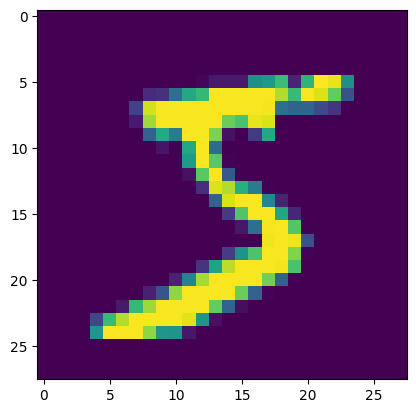

In [8]:
plt.imshow(single_image)

So this is supposed to be a Greyscale image collection, then why these colors ? 
This is just a default coloring scheme: viridis

In [9]:
y_train[0]

5

So the image is supposed to be a handwritten: "5"

But this "5" is definitely not a continuous feature because the number 5 is of no importance, its just tht it belongs to the category 5

SO Actually this is a categorical feature not continuous

SO convert these into categories

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape

(60000,)

In [12]:
example = to_categorical(y_train)
example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

So 5th waala has 1 suggesting it is of the category 5

Convert Train  and Test data into categorical feature:

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

# Normalize The Data: 
Note that our data has parameters ranging from 0-255 we dont want that since our data is greyscale, so normalise it to 0-1.

SO We can divide everything by the max of the array to get normalised data here because we know the images WILL BE EXACTLY FROM 0-255

In [14]:
X_train.max()

255

In [15]:
X_train.min()

0

In [16]:
def normalize_array(arr):
    arr = np.array(arr)  # Convert the input list to a NumPy array
    min_val = arr.min()
    max_val = arr.max()
    normalized_arr = (arr - min_val) / (max_val - min_val)
    return normalized_arr


In [17]:
X_test = normalize_array(X_test)
X_train = normalize_array(X_train)

In [18]:
X_test[0].max() , X_train[0].max()

(1.0, 1.0)

In [19]:
X_test[0].min(), X_train.min()

(0.0, 0.0)

# Reshape the Data
We have talked that this data set is a GREYSCALED image dataset but we also need to define it 

In [20]:
X_test.shape, X_train.shape

((10000, 28, 28), (60000, 28, 28))

In [21]:
# Sample size, width, height, color_channels
X_train = X_train.reshape(60000, 28 ,28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# Model Training

## CNN Layer

    # For CNN, first layer will always be some CNN layer
    # Then a pooling layer

    Filter => Powers of 2,
    its value: If your dataset is very large, has many classes(here only 10), then make your filter large in powers of 2

    Kernel_Size => Powers of 2,
    its value similar to filter, if large dataset, varied classes, have large value

    Strides => How much our kernel is moving each time
    If our Image is large, Kernel_size small, then having a larger stride is better, here default (1,1) is ok

    Padding:
    imageSize/kernel => 28/4 = 7, no decimals so valid is okay, no padding required

    VALID: Don't apply any padding, i.e., assume that all dimensions are valid so that input image fully gets covered by filter and stride you specified.
    SAME: Apply padding to input (if needed) so that input image gets fully covered by filter and stride you specified. For stride 1, this will ensure that output image size is same as input.

## POOLING LAYER
    PoolSize = Half the size of kernel

    # FOR MORE COMPLEX CNN, WE CAN KEEP ADDING CNN,POOLING LAYERS.

## Flatten The Image
    # After adding layers we need to flatten the image out: 28*28 = 784

### Whats Fixed: 
    Input_shape --> Determined by your Image Dimensions

    Flatten Layer --> After CNN layers, have to add a Flatten layer

    Output Layer --> If Binary Classificaton Dense(1, activation="sigmoid")
                    If Multiclass Classificaton Dense(1, activation="softmax")

    Loss

### What to Play Around With: 
    Add as many CNN Layers,Pooling Layers as you want
    Activation Function Changed

    After Flatten Add only a few Dense Layers Not Many

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

model.add(Conv2D(filters=32, kernel_size = (4,4), strides=(1,1), 
                 padding="valid", input_shape = (28,28,1), activation="relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())


model.add(Dense(128, activation="relu"))

# Output Layer: 10 Because we have 10 different classes of classification
# Softmax --> Multiclass Classification
model.add(Dense(10, activation="softmax"))

# Compile the model: 
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics="accuracy")

# Callbacks

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = "val_accuracy", patience=5)

In [24]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/30
1875/1875 [==============================] - 18s 6ms/step - loss: 0.1464 - accuracy: 0.9564 - val_loss: 0.0579 - val_accuracy: 0.9809
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0512 - accuracy: 0.9841 - val_loss: 0.0411 - val_accuracy: 0.9860
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0333 - accuracy: 0.9892 - val_loss: 0.0383 - val_accuracy: 0.9868
Epoch 4/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0224 - accuracy: 0.9928 - val_loss: 0.0422 - val_accuracy: 0.9858
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0156 - accuracy: 0.9949 - val_loss: 0.0394 - val_accuracy: 0.9870
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0118 - accuracy: 0.9961 - val_loss: 0.0411 - val_accuracy: 0.9877
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0103 - accuracy: 0.9965 - val_loss: 0.0426 - val_accur

In [25]:
# Save the trained model
model.save("./model/mnist.h5")

In [26]:
# Load the model
# from tensorflow.keras.models import load_model
# model = load_model("./model/mnist.h5")

# Evaluate The Model

In [27]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.146365,0.956383,0.057874,0.9809
1,0.051201,0.984150,0.041083,0.9860
2,0.033332,0.989183,0.038298,0.9868
3,0.022392,0.992767,0.042188,0.9858
4,0.015619,0.994933,0.039410,0.9870


<Axes: >

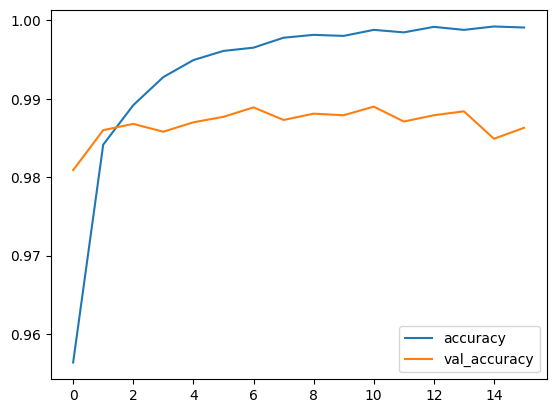

In [28]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

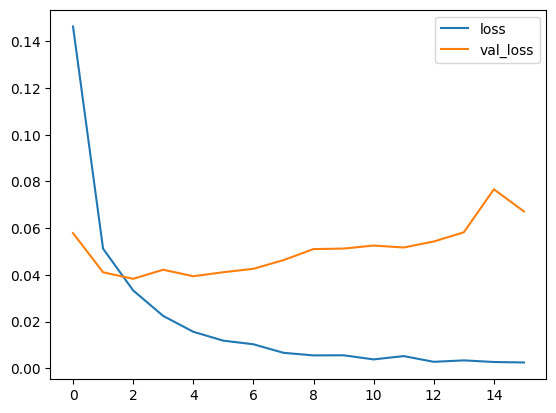

In [29]:
losses[['loss','val_loss']].plot()

In [30]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.06715447455644608, 0.986299991607666]


In [31]:
from sklearn.metrics import classification_report,confusion_matrix
y_preds = model.predict(X_test)
print(y_test.shape, y_preds.shape)

# Convert one-hot encoded y_test back to the original format
y_test_labels = np.argmax(y_test, axis=1)
y_preds_labels = np.argmax(y_preds, axis=1)

print(y_test_labels.shape, y_preds_labels.shape)

print(classification_report(y_test_labels, y_preds_labels))

313/313 [==============================] - 1s 3ms/step
(10000, 10) (10000, 10)
(10000,) (10000,)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [32]:
confusion_matrix(y_test_labels, y_preds_labels)

array([[ 975,    1,    1,    1,    0,    0,    1,    0,    0,    1],
       [   1, 1125,    1,    3,    0,    1,    0,    1,    2,    1],
       [   1,    1, 1001,    6,    0,    0,    1,    8,   13,    1],
       [   0,    0,    0, 1003,    0,    2,    0,    1,    3,    1],
       [   1,    0,    0,    0,  975,    0,    0,    0,    0,    6],
       [   1,    0,    0,    7,    0,  881,    2,    0,    0,    1],
       [   6,    4,    1,    0,    2,    2,  938,    0,    5,    0],
       [   0,    4,    3,    0,    1,    0,    0, 1013,    3,    4],
       [   2,    0,    0,    2,    1,    1,    0,    2,  963,    3],
       [   1,    0,    0,    4,    5,    4,    0,    3,    3,  989]],
      dtype=int64)

<Axes: >

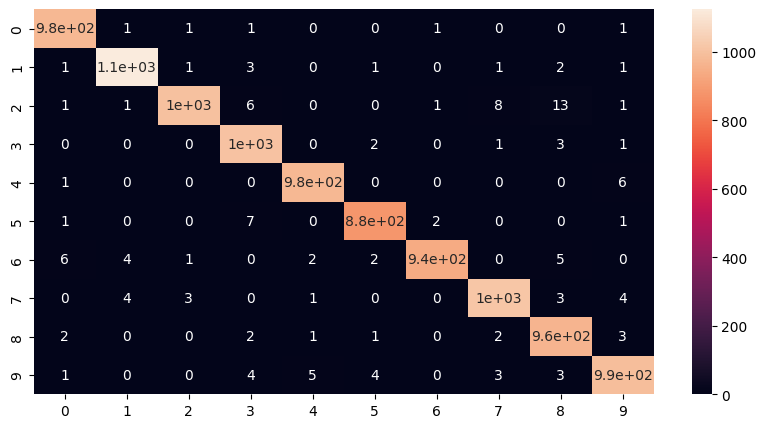

In [33]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test_labels, y_preds_labels), annot=True)

# New Data

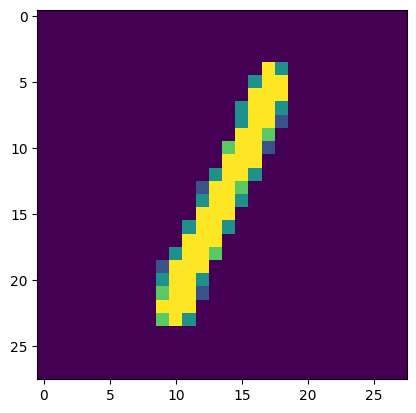

In [36]:
new_number = X_test[6969]
plt.imshow(new_number.reshape(28,28))

In [40]:
prediction = model.predict(new_number.reshape(1,28,28,1))
predicted_class = np.argmax(prediction)

print("Predicted class label:", predicted_class)

1/1 [==============================] - 0s 29ms/step
Predicted class label: 1
